<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <div style="border: 2px solid #BBA0CA; padding: 20px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">
        <h1 style="color: #583B68; font-size: 32px; text-transform: uppercase; letter-spacing: 2px; margin-bottom: 20px;">EDA & modelling using Ensemble Learning</h1>
        <div style="color: #583B68"><em>
       If you like the content please consider an upvote. It is a great motivator to keep sharing code and ideas.
        Thank you!!!
    </em></div>
</div>

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">Introduction</h1>
    </div></div>

<p>This notebook is created for Multiclass Classification with a Obesity Risk data in the Playground Season-4 Episode-2.
        </p>
        <p>This notebook attempts to perform Exploratory Data Analysis on the Obesity Risk Dataset and eventually train a model on it and enhance the predictions by fine-tuning the model.
        </p>
        <blockquote>  If you find this notebook helpful please consider upvoting ❤️ <br>
    and follow me on twitter <a href="https://twitter.com/SalhotraDeepesh"><b>@SalhotraDeepesh</b></a></blockquote> 
    </div>
</div>

## Contents:
<hr>

1. [Libraries](#Libraries)
2. [Data](#data)
3. [Target Feature](#target)
4. [Exploratory Data Analysis](#eda)
5. [Optimizer](#opt)
6. [Model Training](#model)
7. [Feature Importance](#feature)
8. [Submission](#sub)

### Important Libraries used in the project:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- LighGBM
- XGBoost
- CatBoost
- Optuna
- warnings

### Models used to make predictions:

- LighGBM Classifier
- Optuna for Hyperparameter tuning

Now, let's import the data.

# Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the default color palette to "pastel"
sns.set_palette("muted")
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations
import random
import gc

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from umap import UMAP
from sklearn.manifold import TSNE

# Import libraries for Hypertuning
import optuna

# Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier, Pool

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

2024-02-04 14:28:05.768526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 14:28:05.768666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 14:28:05.954630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('seaborn-v0_8-pastel')

# Data


# 1. Data Exploration: <a name="data"></a>
The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Obesity or CVD risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data).

> Submissions are evaluated using the accuracy score.

## 1.1 Data Description:

Here is a quick description of the data which was taken from the original data.

### Features:
- FAVC: Frequent consumption of high caloric food,
- FCVC: Frequency of consumption of vegetables,
- NCP: Number of main meals,
- CAEC: Consumption of food between meals,
- CH20: Consumption of water daily,
- CALC: Consumption of alcohol.
- SCC: Calories consumption monitoring,
- FAF: Physical activity frequency,
- TUE: Time using technology devices,
- MTRANS: Transportation used.
- Gender,
- Age,
- Height and
- Weight.

> In Original data 'TUE', 'FAF', 'CH2O', 'NCP', 'FCVC' columns are categorical with 2 or 3 classes but in the competition data they are numerical so you can keep them as it is or round them to nearest integers to turn them into categorical varibles.

### Targets:
- Underweight: Less than 18.5
- Normal: 18.5 to 24.9
- Overweight: 25.0 to 29.9
- Obesity I: 30.0 to 34.9
- Obesity II: 35.0 to 39.9
- Obesity III: Higher than 40


## 1.2 Import Datasets
Here we import our train-test data and the original data as well. 
<br>
I have also changed the index of original dataset just in case we find it suitable to include in our training dataset.
<br> I have also set a target_col variable which we can use. 

In [3]:
filepath = '/kaggle/input/playground-series-s4e2/'
df_train = pd.read_csv(os.path.join(filepath, 'train.csv'), index_col=[0])
df_test = pd.read_csv(os.path.join(filepath, 'test.csv'), index_col=[0])
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

original = original.reset_index()
original['id'] = original.index + df_test.index[-1] +1
original = original.drop(columns=['index']).set_index('id')

target_col = 'NObeyesdad'

In [4]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
original.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
34598,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
34599,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
34600,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
34601,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
34602,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 1.3 Stats
Here we look at the stats of our datasets. Precisely we are looking at the following:
- Basic stats
- Null values
- Duplicate values
- Unique values

In [7]:
df_train.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


In [8]:
df_test.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,13840.000000,23.952740,5.799814,14.000000,20.000000,22.906342,26.000000,61.000000
Height,13840.000000,1.698934,0.088761,1.450000,1.631662,1.700000,1.760710,1.980000
Weight,13840.000000,87.384504,26.111819,39.000000,65.000000,83.952968,111.157811,165.057269
FCVC,13840.000000,2.442898,0.531606,1.000000,2.000000,2.358087,3.000000,3.000000
NCP,13840.000000,2.750610,0.710927,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,13840.000000,2.032044,0.611230,1.000000,1.771781,2.000000,2.552388,3.000000
FAF,13840.000000,0.974532,0.840361,0.000000,0.001086,1.000000,1.571865,3.000000
TUE,13840.000000,0.611033,0.608005,0.000000,0.000000,0.552498,1.000000,2.000000


In [9]:
df_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
df_test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [11]:
print("Duplicates in train data: ", df_train.duplicated().sum())
print("Duplicates in original data: ", original.duplicated().sum())

Duplicates in train data:  0
Duplicates in original data:  24


In [12]:
def unique_vals(df, name=None):
    for col in df_test.columns:
        print(f"Unique values in {col}-{name}: {df[col].nunique()}")

unique_vals(df_train, 'Training Data')
print("\n")
unique_vals(original, 'Original Data')

Unique values in Gender-Training Data: 2
Unique values in Age-Training Data: 1703
Unique values in Height-Training Data: 1833
Unique values in Weight-Training Data: 1979
Unique values in family_history_with_overweight-Training Data: 2
Unique values in FAVC-Training Data: 2
Unique values in FCVC-Training Data: 934
Unique values in NCP-Training Data: 689
Unique values in CAEC-Training Data: 4
Unique values in SMOKE-Training Data: 2
Unique values in CH2O-Training Data: 1506
Unique values in SCC-Training Data: 2
Unique values in FAF-Training Data: 1360
Unique values in TUE-Training Data: 1297
Unique values in CALC-Training Data: 3
Unique values in MTRANS-Training Data: 5


Unique values in Gender-Original Data: 2
Unique values in Age-Original Data: 1402
Unique values in Height-Original Data: 1574
Unique values in Weight-Original Data: 1525
Unique values in family_history_with_overweight-Original Data: 2
Unique values in FAVC-Original Data: 2
Unique values in FCVC-Original Data: 810
Unique 

## 1.4 Analysis
A little analysis of our datasets:
- No null values in train and test dataset
- We have the following categorical variables:
    - Gender
    - family_history_with_overweight
    - FAVC
    - CAEC
    - SMOKE
    - SCC
    - CALC
    - MTRANS
- We have the following continuous variables:
    - Age
    - Height
    - Weight
    - FCVC
    - NCP
    - CH2O
    - FAF
    - TUE

# 2. Target Feature

Now we will look at our target feature and try to analyze it

## 2.1 Plot Target Feature
We will plot a pie-chart and a count plot of our target variable since it is a categorical feature with 7 classes. the 7 classes that we have are:
- Insufficient_Weight
- Normal_Weight
- Overweight_Level_I
- Overweight_Level_II
- Obesity_Type_I
- Obesity_Type_II
- Obesity_Type_III

We want to see the distribustion of each type of class, to make sure that one class doesn't dominate our training dataset




In [13]:
def target_feature_plot(df_train, target_col, fig_size=(15,4), palette='colorblind', name='Train'):
    fig, ax = plt.subplots(1,2,figsize=fig_size)
    sns.set(font_scale=0.7)
    df_train[target_col].value_counts().plot.pie(autopct='%1.1f%%',
                                                wedgeprops={'width': 0.5},
                                                startangle=0,
                                                ax=ax[0],
                                                shadow=False,
                                                textprops={'fontsize': 9})
                                                #colors=palette)
    sns.countplot(data=df_train, x=target_col)
    plt.suptitle(f"Target Analysis: {name}")
    plt.tight_layout()
    plt.show()

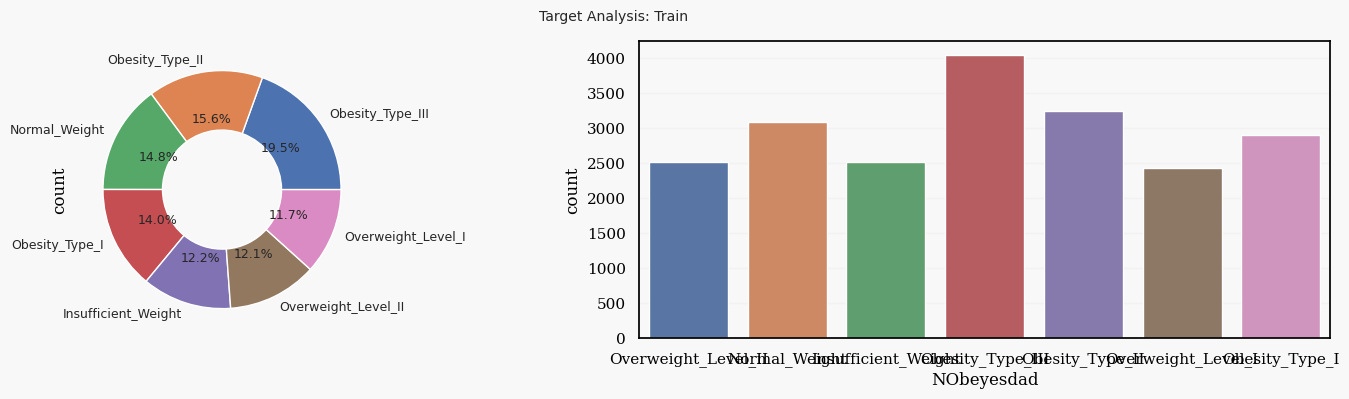

In [14]:
target_feature_plot(df_train, target_col, name='Train')

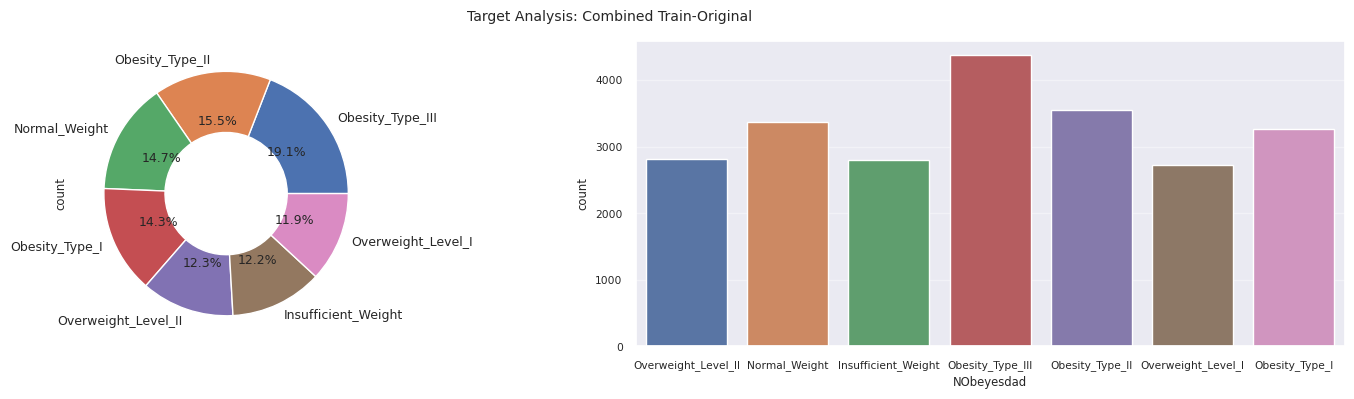

In [15]:
target_feature_plot(pd.concat([df_train, original], axis=0), target_col, name='Combined Train-Original')

## 2.2 Analysis
We can see that classes are roughly equally split which is good for us since we won't have to deal with an imbalanced dataset

# Exploratory Data Analysis
